# Sentence Transformers

In [ ]:
!pip install -U sentence-transformers

https://www.sbert.net/docs/pretrained_models.html

The all-* models where trained on all available training data (more than 1 billion training pairs) and are designed as general purpose models. The all-mpnet-base-v2 model provides the best quality, while all-MiniLM-L6-v2 is 5 times faster and still offers good quality.

In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')

sentences = [
    "How much would you like to earn?",
    "Did you walk the dog?",
    "Let's order some food"]

embeddings = model.encode(sentences)

for sentence, embedding in zip(sentences, embeddings):
    print("Sentence:", sentence)
    print("Embedding:", embedding)
    print("")

Sentence: How much would you like to earn?
Embedding: [-5.59683628e-02  6.08852087e-03 -2.30037179e-02  3.58715095e-02
 -5.67457974e-02 -5.91111593e-02  6.10551499e-02 -1.70961581e-02
 -2.18116995e-02  4.45377268e-02 -6.04546070e-03 -1.31622151e-01
 -2.57951450e-02  3.70906815e-02 -4.11295220e-02  2.43845042e-02
  5.73320985e-02 -4.66783391e-03 -2.36242581e-02 -2.70143021e-02
 -1.63694546e-02 -3.01830517e-03  4.02642135e-03 -4.08390425e-02
  8.42516795e-02 -1.34428060e-02  4.06062342e-02  2.37139296e-02
  6.08691899e-03  3.05540208e-02 -2.50027771e-03  2.53838450e-02
  3.63580212e-02  1.22970494e-03 -4.65963455e-03 -3.15656066e-02
  4.14991118e-02  5.38026541e-03 -9.40303318e-03  3.29785310e-02
  1.97729617e-02  5.76724950e-03 -3.37972050e-03 -5.05708084e-02
 -4.69443016e-02 -2.89840549e-02  9.68194902e-02  9.09388065e-02
  6.38272613e-02  6.78699166e-02  7.06686229e-02  1.05912611e-03
  1.36349222e-03 -2.34296750e-02 -3.16229975e-03 -6.77426485e-03
 -6.63314536e-02  7.63653517e-02  1.

## Semantic Search

In [ ]:
from sentence_transformers import util

sentences = [
    "How much would you like to earn?",
    "Did you walk the dog?",
    "Let's order some food"
]

phrase = "Can you go out with your pet?"

sentences_embeddings = model.encode(sentences)
phrase_embeddings = model.encode(phrase)

similarities = util.dot_score(sentences_embeddings, phrase_embeddings)

sorted(zip(sentences, similarities), key=lambda x: x[1][0], reverse=True)

[('Did you walk the dog?', tensor([0.4865])),
 ("Let's order some food", tensor([0.1807])),
 ('How much would you like to earn?', tensor([0.0907]))]

## Multilanguage Embeddings

In [ ]:
from sentence_transformers import util, SentenceTransformer

multilanguage_model = SentenceTransformer('distiluse-base-multilingual-cased-v1')

sentences = [
    "How much would you like to earn?",
    "Did you walk the dog?",
    "Let's order some food"
]

phrase = "Czy wyprowadziłeś już psa na spacer?"

sentences_embeddings = multilanguage_model.encode(sentences)
phrase_embeddings = multilanguage_model.encode(phrase)

similarities = util.dot_score(sentences_embeddings, phrase_embeddings)

sorted(zip(sentences, similarities), key=lambda x: x[1][0], reverse=True)

[('How much would you like to earn?', tensor([0.5491])),
 ('Did you walk the dog?', tensor([0.1960])),
 ("Let's order some food", tensor([0.1595]))]

## Multi-modal Embeddings

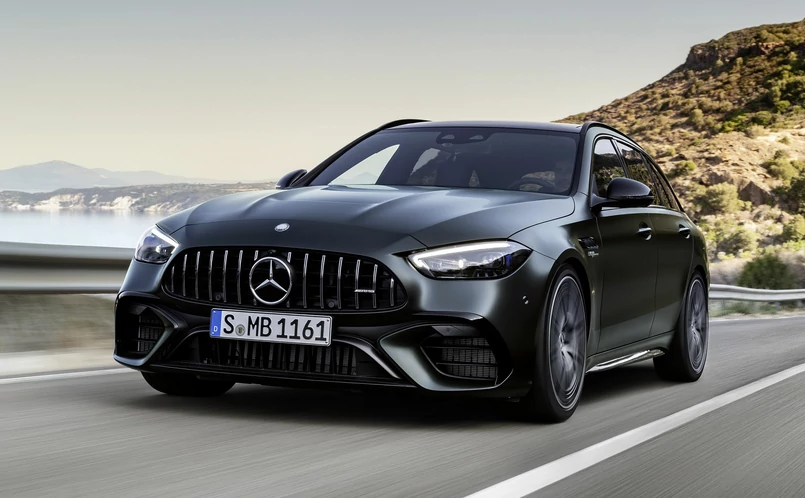

In [ ]:
import requests
from PIL import Image

url = "https://ocdn.eu/pulscms-transforms/1/O_xk9kuTURBXy8xMzdkZjNkMS0zZjg2LTQwZjctYTE1Zi02YjAzMzcxNTc5MWEuanBlZ5GVAs0DJQDDw94AAaEwBQ"

image = Image.open(requests.get(url, stream=True).raw)
image

In [ ]:
from sentence_transformers import SentenceTransformer, util

clip_model = SentenceTransformer('clip-ViT-B-32')

img_emb = clip_model.encode(image)

texts = [
    "Golden Retriever",
    "Black car",
    "Red car",
    "Cow",
]

texts_embeddings = clip_model.encode(texts)

similarities = util.cos_sim(texts_embeddings, img_emb)

sorted(zip(texts, similarities), key=lambda x: x[1][0], reverse=True)

[('Black car', tensor([0.2279])),
 ('Red car', tensor([0.1874])),
 ('Cow', tensor([0.1537])),
 ('Golden Retriever', tensor([0.1245]))]

# Cross Encoder

In [ ]:
from sentence_transformers.cross_encoder import CrossEncoder
model = CrossEncoder('cross-encoder/stsb-distilroberta-base')

phrase = "Can I buy six items?"

retrieved = [
    "There are more than five items in our store",
    "There are many items in our store",
    "There's quite a lot of items in our store"
]

sentence_combinations = [[phrase, r] for r in retrieved]

model.predict(sentence_combinations)

array([0.2243442 , 0.16464294, 0.13699067], dtype=float32)